# Биномиальный критерий для доли

In [1]:
import numpy as np
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [5]:
# n - количество испытаний 
# p - вероятность успеха
n = 100
p = 0.75
F_H0 = stats.binom(n, p)

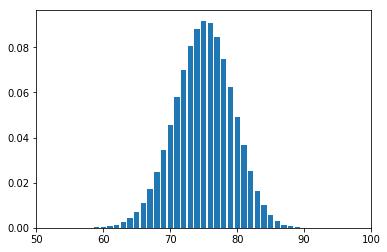

In [6]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(50, 100) 
pylab.show()

In [9]:
p_value = stats.binom_test(67, 100, p)
round(p_value, 4)

0.0822

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [13]:
p_value_1 = stats.binom_test(22, 50, p)
p_value_1

3.4831478978300243e-06

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [14]:
import pandas as pd
import seaborn

In [30]:
!ls pines.txt

pines.txt


In [32]:
data = pd.read_table('pines.txt')
data.head(3)

/home/thomas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4


In [33]:
data.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


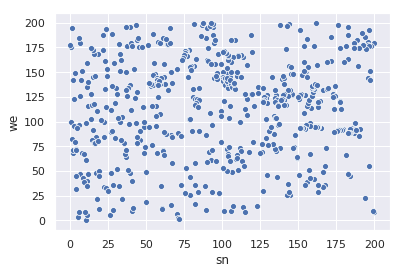

In [43]:
seaborn.scatterplot(data.sn, data.we)

In [51]:
# в качестве аргументов передаем координаты деревьев, ‘count’ означает что считаем сколько
# точек в каждой фигуре, bins - на сколько частей делится поле по осям координат
value_5x5 = stats.binned_statistic_2d(data.we, data.sn, None, 'count', bins=[5,5])

In [52]:
value_5x5.statistic.mean()

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [53]:
# поскольку массив требует для выполнения функции однородности, используем 
# к аргументу numpy.ndarray.flatten()
stats.chisquare(value_5x5.statistic.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)